In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
import math
import os

import plotly.graph_objects as go
import plotly.io as pio
import plotly.express as px


facilityData = pd.read_csv('NREL_base_facilities.csv', encoding= 'unicode_escape')
facilityData

MECS = pd.read_csv('mecs_naics.csv')
NAICS = facilityData['MECS_NAICS'].tolist()
MECS_CODE = MECS['MECS_NAICS'].tolist()
Industry = []

for i in NAICS:
    if i in MECS_CODE:
        subdf = MECS.loc[MECS['MECS_NAICS']==i]
        Industry.append(subdf['MECS_NAICS_desc'].tolist()[0])
    else:
        Industry.append('unlisted')
Industry

facilityData['Industry'] = Industry

In [2]:
facilityData

Unnamed: 0            CITY     COUNTY  COUNTY_FIPS         Coal  \
0               0  SPARROWS POINT  Baltimore        24005     0.000000   
1               1  SPARROWS POINT  Baltimore        24005     0.000000   
2               2  SPARROWS POINT  Baltimore        24005     0.000000   
3               3  SPARROWS POINT  Baltimore        24005     0.000000   
4               4  SPARROWS POINT  Baltimore        24005     0.000000   
...           ...             ...        ...          ...          ...   
94929       94929        VALLIANT  MCCURTAIN        40089     0.000000   
94930       94930        VALLIANT  MCCURTAIN        40089     0.000000   
94931       94931        VALLIANT  MCCURTAIN        40089     0.000000   
94932       94932   ARKANSAS CITY      DESHA         5041     0.000000   
94933       94933        TOMAHAWK    LINCOLN        55069  1491.175997   

       Diesel          END_USE  FACILITY_ID  FINAL_NAICS_CODE  \
0         0.0  Process Heating      1000553            331111   
1         0.0  Process Heating      1000553            331111   
2         0.0  Process Heating      1000553            331111   
3         0.0  Process Heating      1000553            331111   
4         0.0  Process Heating      1000553            331111   
...       ...              ...          ...               ...   
94929     0.0  Process Heating      1006776            322130   
94930     0.0  Process Heating      1006776            322130   
94931     0.0  Process Heating      1006776            322130   
94932     0.0  Process Heating      1002708            322130   
94933     0.0  Process Heating      1003884            322130   

                                 FUEL_TYPE  ... STATE Temp_degC        Total  \
0      Natural Gas (Weighted U.S. Average)  ...    MD      1100   328.280712   
1      Natural Gas (Weighted U.S. Average)  ...    MD      1100   666.678118   
2      Natural Gas (Weighted U.S. Average)  ...    MD      1100   172.814781   
3      Natural Gas (Weighted U.S. Average)  ...    MD      1100  2925.987834   
4      Natural Gas (Weighted U.S. Average)  ...    MD      1100   318.073057   
...                                    ...  ...   ...       ...          ...   
94929                                 Coke  ...    OK       800     0.000000   
94930                                 Coke  ...    OK       800     0.000000   
94931                                 Coke  ...    OK       800     0.000000   
94932                                 Coke  ...    AR       800     0.000000   
94933                           Bituminous  ...    WI       800  1491.175997   

                      UNIT_NAME                      UNIT_TYPE  for_EU_sum  \
0            Pennwood Boiler #1             OB (Boiler, other)        True   
1            Pennwood Boiler #2             OB (Boiler, other)        True   
2            Pennwood Boiler #3             OB (Boiler, other)        True   
3      CP-NG Combustion Sources  OCS (Other combustion source)        True   
4            Pennwood Boiler #4             OB (Boiler, other)        True   
...                         ...                            ...         ...   
94929        Lime Kiln (EUG E7)                              0        True   
94930        Lime Kiln (EUG E7)                              0        True   
94931        Lime Kiln (EUG E7)                              0        True   
94932              #1 Lime Kiln                              0        True   
94933                       B28           CF (Cyclone Furnace)        True   

       Temp_Band  Biogenic   MMTCO2E              Industry  
0         >400°C     False  0.016527  Iron and Steel Mills  
1         >400°C     False  0.033563  Iron and Steel Mills  
2         >400°C     False  0.008700  Iron and Steel Mills  
3         >400°C     False  0.147303  Iron and Steel Mills  
4         >400°C     False  0.016013  Iron and Steel Mills  
...          ...       ...       ...                   ...  
94929     >4

In [3]:
SPP_Facilities = facilityData.loc[(facilityData['STATE']=='NE')|(facilityData['STATE']=='KS')|(facilityData['STATE']=='OK')|(facilityData['STATE']=='SD')]
I = SPP_Facilities['Industry'].tolist()
F = SPP_Facilities['FACILITY_ID'].tolist()
label = []
for i in range(len(I)):
    label.append(('_').join([str(I[i]),str(F[i])]))
SPP_Facilities['Label'] = label

#SPP_Facilities = SPP_Facilities.loc[SPP_Facilities['FUEL_TYPE'] != '0']
SPP_Facilities.columns


<ipython-input-3-7a54986b640b>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  SPP_Facilities['Label'] = label


Index(['Unnamed: 0', 'CITY', 'COUNTY', 'COUNTY_FIPS', 'Coal', 'Diesel',
       'END_USE', 'FACILITY_ID', 'FINAL_NAICS_CODE', 'FUEL_TYPE',
       'FUEL_TYPE_BLEND', 'FUEL_TYPE_OTHER', 'LPG_NGL', 'MECS_NAICS',
       'Natural_gas', 'Other', 'Process_byp', 'Pulp_Paper', 'REPORTING_YEAR',
       'Residual_fuel_oil', 'STATE', 'Temp_degC', 'Total', 'UNIT_NAME',
       'UNIT_TYPE', 'for_EU_sum', 'Temp_Band', 'Biogenic', 'MMTCO2E',
       'Industry', 'Label'],
      dtype='object')

In [4]:
facilityData['Thermal MWh'] = facilityData['Total']*277.778
facilityData['Thermal MWh/hr'] = facilityData['Thermal MWh']/8760

I = facilityData['Industry'].tolist()
F = facilityData['FACILITY_ID'].tolist()
label = []
for i in range(len(I)):
    label.append(('_').join([str(I[i]),str(F[i])]))
facilityData['Label'] = label

facility_IDs = facilityData['FACILITY_ID'].unique()
facilityDataT = pd.DataFrame()

for i in facility_IDs:
    subdf = facilityData.loc[facilityData['FACILITY_ID']==i]
    heats = subdf['Temp_degC'].unique()
    for j in heats:
        subdfH = subdf.loc[subdf['Temp_degC']==j]
        d = subdfH[['Natural_gas','Total','MMTCO2E','Thermal MWh','Thermal MWh/hr']].sum(axis=0)
        info = subdfH[['COUNTY', 'COUNTY_FIPS', 'FACILITY_ID', 'FINAL_NAICS_CODE', 'FUEL_TYPE',
       'MECS_NAICS', 'REPORTING_YEAR', 'STATE', 'Temp_degC','Industry', 'Label']].max()
        x = pd.DataFrame(pd.concat((info,d))).T
        facilityDataT = pd.concat((facilityDataT,x), axis =0)
    
facilityDataT

COUNTY COUNTY_FIPS FACILITY_ID FINAL_NAICS_CODE  \
0           Baltimore       24005     1000553           331111   
0           Baltimore       24005     1000553           331111   
0                BOYD       21019     1005615           331111   
0                BOYD       21019     1005615           331111   
0              Butler       39017     1000274           331111   
..                ...         ...         ...              ...   
0               HENRY       17073     1006469           325193   
0   DES MOINES COUNTY       19057     1002443           325193   
0        HENRY COUNTY       17073     1006787           325193   
0             DUBUQUE       19061     1005626           325193   
0           PALO ALTO       19147     1011694           325193   

                              FUEL_TYPE MECS_NAICS REPORTING_YEAR STATE  \
0   Natural Gas (Weighted U.S. Average)     331111           2011    MD   
0   Natural Gas (Weighted U.S. Average)     331111           2011    MD   
0   Natural Gas (Weighted U.S. Average)     331111           2015    KY   
0   Natural Gas (Weighted U.S. Average)     331111           2015    KY   
0                              Used Oil     331111           2015    OH   
..                                  ...        ...            ...   ...   
0                   Other Biomass Gases     325193           2015    IL   
0                   Other Biomass Gases     325193           2015    IA   
0                   Other Biomass Gases     325193           2015    IL   
0                   Other Biomass Gases     325193           2015    IA   
0   Natural Gas (Weighted U.S. Average)     325193           2015    IA   

   Temp_degC              Industry                         Label Natural_gas  \
0       1100  Iron and Steel Mills  Iron and Steel Mills_1000553     10704.2   
0        180  Iron and Steel Mills  Iron and Steel Mills_1000553     1237.01   
0       1100  Iron and Steel Mills  Iron and Steel Mills_1005615     21433.1   
0        180  Iron and Steel Mills  Iron and Steel Mills_1005615     3231.66   
0       1100  Iron and Steel Mills  Iron and Steel Mills_1000274      139884   
..       ...                   ...                           ...         ...   
0        450         Ethyl Alcohol         Ethyl Alcohol_1006469     18069.5   
0        450         Ethyl Alcohol         Ethyl Alcohol_1002443     15558.7   
0        450         Ethyl Alcohol         Ethyl Alcohol_1006787     16587.8   
0        450         Ethyl Alcohol         Ethyl Alcohol_1005626     13222.6   
0        233         Ethyl Alcohol         Ethyl Alcohol_1011694       506.4   

      Total    MMTCO2E  Thermal MWh Thermal MWh/hr  
0   14207.6     1.4319  3.94657e+06        450.522  
0   9739.41    2.27319   2.7054e+06        308.835  
0     33247    4.15104   9.2353e+06        1054.26  
0   23376.4    5.40101  6.49345e+06        741.262  
0    164283    10.9234  4.56341e+07        5209.37  
..      ...        ...          ...            ...  
0   18104.4   0.911408  5.02902e+06        574.089  
0   15584.5   0.784551  4.32902e+06        494.181  
0   16635.9   0.837466  4.62109e+06        527.521  
0   16730.6   0.839688   4.6474e+06        530.526  
0   767.842  0.0552846       213290        24.3481  

[2692 rows x 16 columns]

In [40]:
import altair as alt
data = facilityDataT
alt.Chart(data).mark_bar().encode(
    x=alt.X('Total', stack="normalize"),
    y='Industry',
    color=alt.Color('FUEL_TYPE', scale=alt.Scale(scheme='tableau20')),
    order=alt.Order(
      # Sort the segments of the bars by this field
      'FUEL_TYPE',
      sort='ascending'
    )
)

alt.Chart(...)

In [6]:
data = SPP_Facilities
alt.Chart(data).mark_bar().encode(
    x=alt.X('Total'),
    y='Label',
    color=alt.Color('FUEL_TYPE', scale=alt.Scale(scheme='tableau20')),
    order=alt.Order(
      # Sort the segments of the bars by this field
      'FUEL_TYPE',
      sort='ascending'
    )
)


alt.Chart(...)

In [7]:


facilities = facilityData['FACILITY_ID'].unique()
temps = []
fuels = []
types = []
num = []
ind = []
for f in facilities:
    subdf = facilityData.loc[facilityData['FACILITY_ID']==f]
    fuels.append(subdf['FUEL_TYPE'].unique())
    types.append(subdf['END_USE'].unique())
    num.append(len(subdf.index))
    ind.append(subdf['Industry'].unique())
    temps.append(subdf['Temp_degC'].unique())
Checker = pd.DataFrame()
Checker['facility'] = facilities
Checker['fuel'] = fuels
Checker['Type'] = types
Checker['number'] = num
Checker['Industry'] = ind
Checker['Temp'] = temps
Checker


facility                                               fuel  \
0      1000553  [Natural Gas (Weighted U.S. Average), Blast Fu...   
1      1005615  [Natural Gas (Weighted U.S. Average), Blast Fu...   
2      1000274  [Natural Gas (Weighted U.S. Average), Blast Fu...   
3      1003403  [Natural Gas (Weighted U.S. Average), Blast Fu...   
4      1000714              [Natural Gas (Weighted U.S. Average)]   
...        ...                                                ...   
1027   1006469  [Natural Gas (Weighted U.S. Average), Biogas (...   
1028   1002443  [Natural Gas (Weighted U.S. Average), Biogas (...   
1029   1006787  [Natural Gas (Weighted U.S. Average), Biogas (...   
1030   1005626  [Natural Gas (Weighted U.S. Average), Biogas (...   
1031   1011694  [Natural Gas (Weighted U.S. Average), Agricult...   

                                                   Type  number  \
0     [Process Heating, CHP and/or Cogeneration Proc...      72   
1     [Process Heating, CHP and/or Cogeneration Proc...     127   
2     [Process Heating, CHP and/or Cogeneration Proc...     209   
3     [Process Heating, CHP and/or Cogeneration Proc...      72   
4     [Process Heating, CHP and/or Cogeneration Proc...      24   
...                                                 ...     ...   
1027                                  [Process Heating]      10   
1028                                  [Process Heating]      10   
1029                                  [Process Heating]      10   
1030                                  [Process Heating]      10   
1031                          [Conventional Boiler Use]       4   

                    Industry         Temp  
0     [Iron and Steel Mills]  [1100, 180]  
1     [Iron and Steel Mills]  [1100, 180]  
2     [Iron and Steel Mills]  [1100, 180]  
3     [Iron and Steel Mills]  [1100, 180]  
4     [Iron and Steel Mills]  [1100, 180]  
...                      ...          ...  
1027         [Ethyl Alcohol]        [450]  
1028         [Ethyl Alcohol]        [450]  
1029         [Ethyl Alcohol]        [450]  
1030         [Ethyl Alcohol]        [450]  
1031         [Ethyl Alcohol]        [233]  

[1032 rows x 6 columns]

In [8]:
Checker.to_csv('IndustryData.csv')

In [9]:
profiles = pd.read_csv('all_load_shapes_process_heat.csv')

In [10]:
profiles

month  dayofweek  hour  Weekly_op_hours  Weekly_op_hours_low  \
0            1          0     0           0.2000               0.2000   
1            1          0     1           0.2000               0.2000   
2            1          0     2           0.2000               0.2000   
3            1          0     3           0.2000               0.2000   
4            1          0     4           0.2000               0.2000   
...        ...        ...   ...              ...                  ...   
2505883     12          6    19           0.1988               0.1988   
2505884     12          6    20           0.1988               0.1988   
2505885     12          6    21           0.1988               0.1988   
2505886     12          6    22           0.1988               0.1988   
2505887     12          6    23           0.1988               0.1988   

         Weekly_op_hours_high   naics Emp_Size        enduse  
0                      0.2000  311919    ghgrp  process_heat  
1                      0.2000  311919    ghgrp  process_heat  
2                      0.2000  311919    ghgrp  process_heat  
3                      0.2000  311919    ghgrp  process_heat  
4                      0.2000  311919    ghgrp  process_heat  
...                       ...     ...      ...           ...  
2505883                0.9940  336411    ghgrp  process_heat  
2505884                0.9940  336411    ghgrp  process_heat  
2505885                0.9940  336411    ghgrp  process_heat  
2505886                0.9940  336411    ghgrp  process_heat  
2505887                0.1988  336411    ghgrp  process_heat  

[2505888 rows x 9 columns]

In [11]:
profiles['Weekly'] = profiles['hour']+profiles['dayofweek']*24


Day1 = profiles.loc[(profiles['month']==1) & (profiles['dayofweek']==3)]
profiles

month  dayofweek  hour  Weekly_op_hours  Weekly_op_hours_low  \
0            1          0     0           0.2000               0.2000   
1            1          0     1           0.2000               0.2000   
2            1          0     2           0.2000               0.2000   
3            1          0     3           0.2000               0.2000   
4            1          0     4           0.2000               0.2000   
...        ...        ...   ...              ...                  ...   
2505883     12          6    19           0.1988               0.1988   
2505884     12          6    20           0.1988               0.1988   
2505885     12          6    21           0.1988               0.1988   
2505886     12          6    22           0.1988               0.1988   
2505887     12          6    23           0.1988               0.1988   

         Weekly_op_hours_high   naics Emp_Size        enduse  Weekly  
0                      0.2000  311919    ghgrp  process_heat       0  
1                      0.2000  311919    ghgrp  process_heat       1  
2                      0.2000  311919    ghgrp  process_heat       2  
3                      0.2000  311919    ghgrp  process_heat       3  
4                      0.2000  311919    ghgrp  process_heat       4  
...                       ...     ...      ...           ...     ...  
2505883                0.9940  336411    ghgrp  process_heat     163  
2505884                0.9940  336411    ghgrp  process_heat     164  
2505885                0.9940  336411    ghgrp  process_heat     165  
2505886                0.9940  336411    ghgrp  process_heat     166  
2505887                0.1988  336411    ghgrp  process_heat     167  

[2505888 rows x 10 columns]

In [24]:
profiles
Profiles_Trunc = pd.DataFrame()
F = facilityDataT['FINAL_NAICS_CODE'].unique().tolist()
I = facilityDataT['Industry'].unique().tolist()
I_list = []
for i in range(len(F)):
    subdf = profiles.loc[profiles['naics']==F[i]]
    if len(subdf.index.tolist())>0:
        Profiles_Trunc = pd.concat((Profiles_Trunc,subdf))
        I_list+=([I[i]]*len(subdf.index.tolist()))
#print(I_list)
Profiles_Trunc['Industry'] = I_list
Profiles_Trunc

month  dayofweek  hour  Weekly_op_hours  Weekly_op_hours_low  \
2140992      1          0     0         0.191000             0.191000   
2140993      1          0     1         0.191000             0.191000   
2140994      1          0     2         0.191000             0.191000   
2140995      1          0     3         0.191000             0.191000   
2140996      1          0     4         0.191000             0.191000   
...        ...        ...   ...              ...                  ...   
2187355     12          6    19         0.710886             0.710886   
2187356     12          6    20         0.710886             0.710886   
2187357     12          6    21         0.710886             0.710886   
2187358     12          6    22         0.710886             0.710886   
2187359     12          6    23         0.685813             0.685813   

         Weekly_op_hours_high   naics Emp_Size        enduse  Weekly  \
2140992              0.191000  325110    n1_49  process_heat       0   
2140993              0.191000  325110    n1_49  process_heat       1   
2140994              0.191000  325110    n1_49  process_heat       2   
2140995              0.191000  325110    n1_49  process_heat       3   
2140996              0.191000  325110    n1_49  process_heat       4   
...                       ...     ...      ...           ...     ...   
2187355              0.710886  325193    ghgrp  process_heat     163   
2187356              0.710886  325193    ghgrp  process_heat     164   
2187357              0.710886  325193    ghgrp  process_heat     165   
2187358              0.710886  325193    ghgrp  process_heat     166   
2187359              0.685813  325193    ghgrp  process_heat     167   

               Industry  
2140992  Petrochemicals  
2140993  Petrochemicals  
2140994  Petrochemicals  
2140995  Petrochemicals  
2140996  Petrochemicals  
...                 ...  
2187355   Ethyl Alcohol  
2187356   Ethyl Alcohol  
2187357   Ethyl Alcohol  
2187358   Ethyl Alcohol  
2187359   Ethyl Alcohol  

[122976 rows x 11 columns]

C:\Users\maxva\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


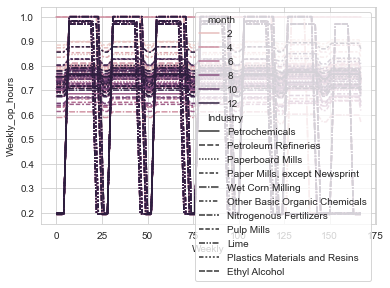

In [26]:
#sns.set(rc = {'figure.figsize':(15,3)})
Profiles_Trunc= Profiles_Trunc.loc[Profiles_Trunc['Emp_Size'] == 'ghgrp']
sns.set_style("whitegrid")
sc = sns.lineplot(Profiles_Trunc['Weekly'],Profiles_Trunc['Weekly_op_hours'], hue = Profiles_Trunc['month'],style = Profiles_Trunc['Industry']) # , legend = False
#sc.set(ylabel='Facility Demand [MWh-th/hr]')
#sc.set(xlabel='Natural Gas Cost [$/mmbtu]')
#sc.set(xlim=(0,50))
plt.show()
sc.figure.savefig('hourlyProfile.png', dpi = 700)

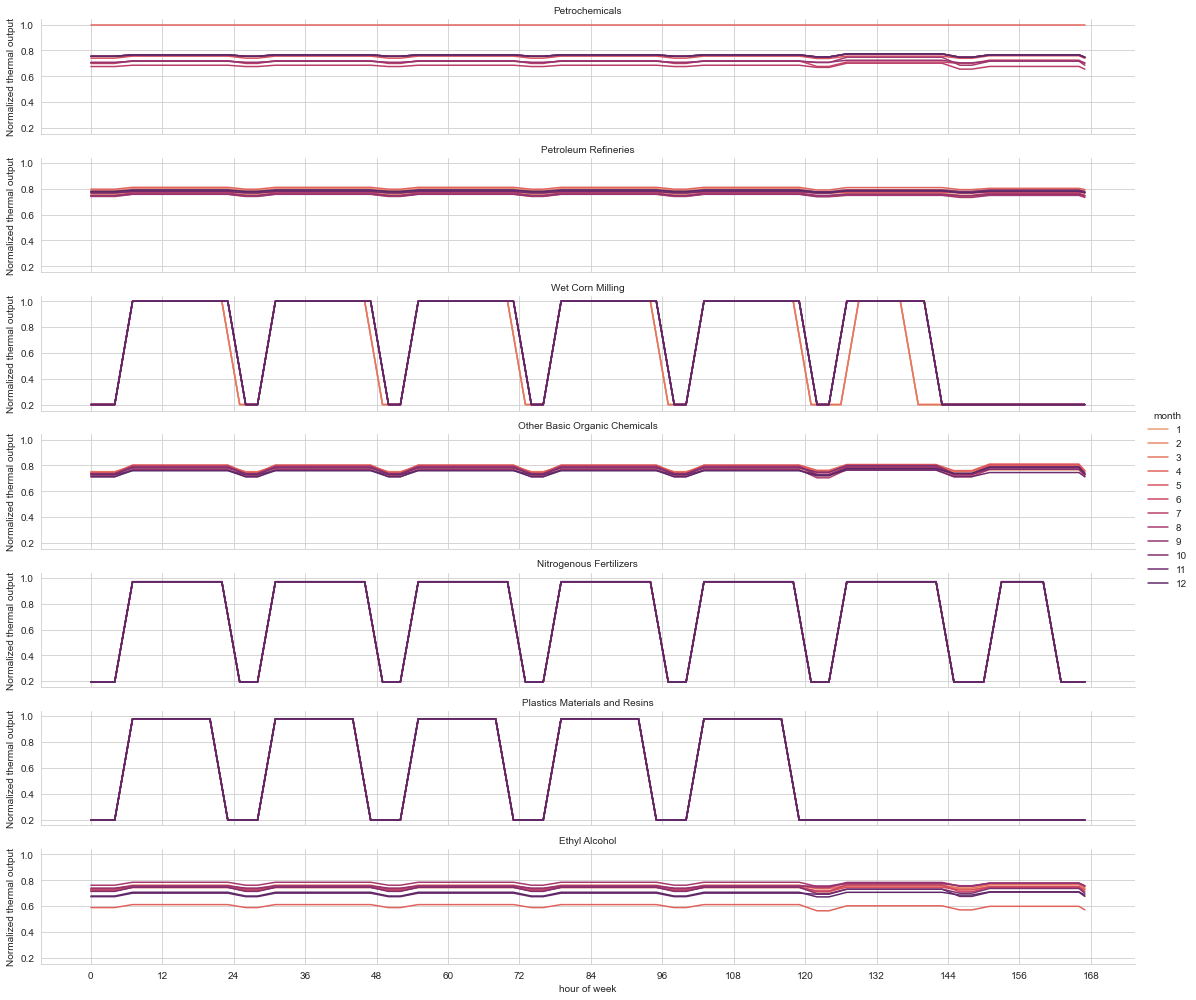

In [43]:
Profiles_Trunc = Profiles_Trunc.loc[(Profiles_Trunc['Industry'] != 'Iron and Steel Mills') & (Profiles_Trunc['Industry'] != 'Paperboard Mills') & (Profiles_Trunc['Industry'] != 'Paper Mills, except Newsprint') & (Profiles_Trunc['Industry'] != 'Pulp Mills') & (Profiles_Trunc['Industry'] != 'Lime')]


g = sns.FacetGrid(Profiles_Trunc, col="Industry", hue="month",col_wrap = 1, palette = 'flare', height=2, aspect=8) # 
g.map(sns.lineplot, "Weekly", "Weekly_op_hours", alpha=1)#marker="x", edgecolor="Distance (mi)"
g.set(xlabel='hour of week')
g.set(xticks=[0,12,24,36,48,60,72,84,96,108,120,132,144,156,168])
g.set(ylabel='Normalized thermal output')
g.set_titles(col_template="{col_name}")
g.add_legend()
g.savefig('Industrial_Hourly_Profiles.png', dpi = 700)

In [17]:
facilityDataT['Industry'].unique()

array(['Iron and Steel Mills', 'Petrochemicals', 'Petroleum Refineries',
       'Paperboard Mills', 'Paper Mills, except Newsprint',
       'Wet Corn Milling', 'Other Basic Organic Chemicals',
       'Nitrogenous Fertilizers', 'Pulp Mills', 'Alkalies and Chlorine',
       'Lime', 'unlisted', 'Plastics Materials and Resins',
       'Ethyl Alcohol'], dtype=object)

In [76]:
yr = 2019
naics = 311221
s = pd.date_range((str(yr)+'-01-01'), (str(yr+1)+'-01-01'), freq='H').to_series()
d = s.dt.dayofweek.tolist()
m = s.dt.month.tolist()
h = s.dt.hour.tolist()
Demands = pd.DataFrame()
Demands['Month'] = m
Demands['Day'] = d
Demands['Hour'] = h
Demands

for n in facilityDataT['FINAL_NAICS_CODE'].unique():
    t = 0
    
    dem = []
    while t < len(h):
        subdf = Profiles_Trunc.loc[(Profiles_Trunc['month']== m[t]) & (Profiles_Trunc['naics']== n) & (Profiles_Trunc['hour']== h[t]) & (Profiles_Trunc['dayofweek']== d[t])]
        if len(subdf.index) ==1:
            dem.append(float(subdf['Weekly_op_hours']))
        else:
            dem.append(1)
        t+=1
    Demands[n] = dem

Demands

NameError: name 'year' is not defined

In [73]:
facilityDataT['FINAL_NAICS_CODE'].unique()

array([331111, 325110, 324110, 322130, 322121, 311221, 325199, 325311,
       322110, 325181, 327410, 212391, 325211, 325193], dtype=object)

In [77]:
Demands.to_csv(str(yr)+'_NAICS_Demand_Porfiles.csv')

In [78]:
Demands

Month  Day  Hour  331111    325110    324110  322130  322121    311221  \
0         1    1     0       1  0.762144  0.763358       1       1  0.466667   
1         1    1     1       1  0.758459  0.758852       1       1  0.200000   
2         1    1     2       1  0.754773  0.754347       1       1  0.200000   
3         1    1     3       1  0.754773  0.754347       1       1  0.200000   
4         1    1     4       1  0.754773  0.754347       1       1  0.200000   
...     ...  ...   ...     ...       ...       ...     ...     ...       ...   
8756     12    1    20       1  0.765830  0.791081       1       1  1.000000   
8757     12    1    21       1  0.765830  0.791081       1       1  1.000000   
8758     12    1    22       1  0.765830  0.791081       1       1  1.000000   
8759     12    1    23       1  0.765830  0.791081       1       1  1.000000   
8760      1    2     0       1  0.762144  0.763358       1       1  0.466667   

        325199    325311  322110  325181  327410  212391    325211    325193  
0     0.764139  0.452667       1       1       1       1  0.196000  0.748510  
1     0.748750  0.194000       1       1       1       1  0.196000  0.740590  
2     0.733362  0.194000       1       1       1       1  0.196000  0.732670  
3     0.733362  0.194000       1       1       1       1  0.196000  0.732670  
4     0.733362  0.194000       1       1       1       1  0.196000  0.732670  
...        ...       ...     ...     ...     ...     ...       ...       ...  
8756  0.759204  0.970000       1       1       1       1  0.980000  0.707577  
8757  0.759204  0.970000       1       1       1       1  0.718667  0.707577  
8758  0.759204  0.970000       1       1       1       1  0.457333  0.707577  
8759  0.759204  0.711333       1       1       1       1  0.196000  0.707577  
8760  0.764139  0.452667       1       1       1       1  0.196000  0.748510  

[8761 rows x 17 columns]

In [83]:
dirList = os.listdir()
if (str(yr)+'_NAICS_Demand_Porfiles.csv') in dirList:
    Demands2 = pd.read_csv((str(yr)+'_NAICS_Demand_Porfiles.csv'))
Demands2[325193]

KeyError: 325193